In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 8.3 MB/s eta 0:00:00
     -------------------------------------- 307.0/307.0 KB 6.3 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\Student\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
filename = 'building1retail.csv'
df = pd.read_csv(filename, index_col=[0], 
                 date_parser=lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M"))
df.head()


OAT (F)  Power (kW)
Timestamp                               
2010-01-01 01:15:00       51       165.1
2010-01-01 01:30:00       51       151.6
2010-01-01 01:45:00       51       146.9
2010-01-01 02:00:00       51       153.7
2010-01-01 02:15:00       51       153.8

<AxesSubplot:xlabel='Timestamp'>

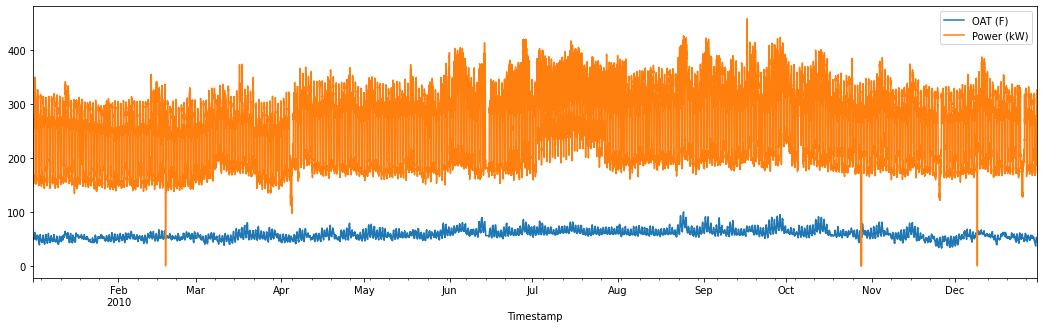

In [5]:
df.plot(figsize=(18,5))

<AxesSubplot:xlabel='Timestamp'>

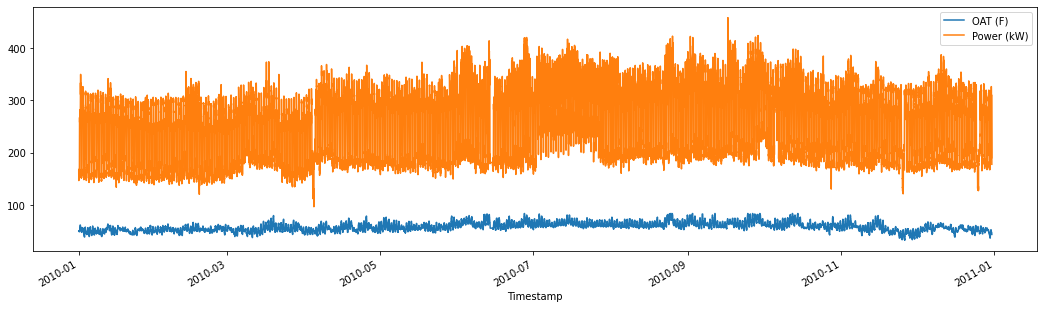

In [5]:
std_dev = 3
df = df[(np.abs(stats.zscore(df)) < std_dev).all(axis=1)]
df.plot(figsize=(18,5))


array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

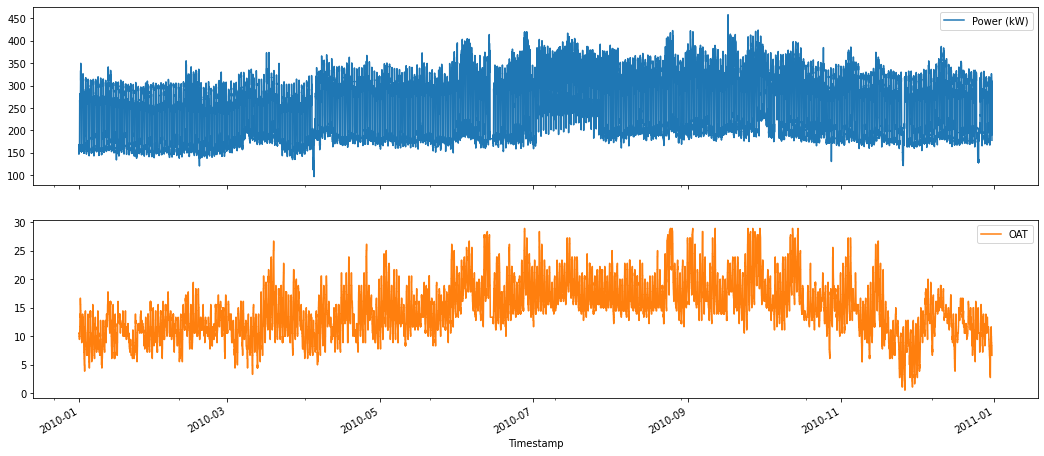

In [6]:
df["OAT"] = (df["OAT (F)"] - 32) / 1.8
df.drop(columns=["OAT (F)"], inplace=True)
df.plot(subplots=True,figsize=(18,8))


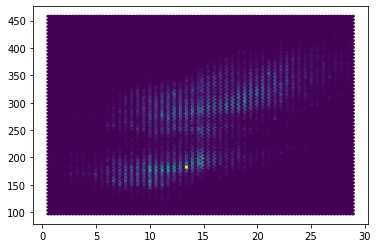

In [7]:
plt.hexbin(df['OAT'], df['Power (kW)'])

<AxesSubplot:xlabel='Timestamp'>

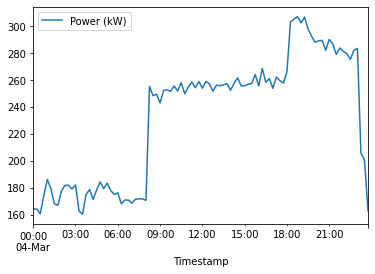

In [10]:
df.loc['2010-03-04', ['Power (kW)']].plot()

In [11]:
x = pd.DataFrame(df['OAT'])
y = pd.DataFrame(df['Power (kW)'])


In [16]:
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True)


In [17]:
for i, (train, test) in enumerate(kfold.split(x, y)):
    model.fit(x.iloc[train,:], y.iloc[train,:])
    score = model.score(x.iloc[test,:], y.iloc[test,:])
    scores.append(score)

scores

[0.8140132329471238, 0.8108389718916648, 0.8078294470056208]

<AxesSubplot:xlabel='Timestamp'>

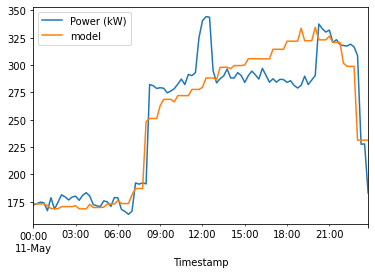

In [18]:
day = '2010-05-11'
test_day = y.loc[day, :]
test_day["model"] = model.predict(x.loc[day, :])
test_day.plot()


In [15]:
x = pd.DataFrame(df['OAT'])
x["tod"] = x.index.hour

# drop_first = True removes multi-collinearity
add_var = pd.get_dummies(x["tod"], prefix="tod", drop_first=True)

# Add all the columns to the model data
x = x.join(add_var)

# Drop the original column that was expanded
x.drop(columns=["tod"], inplace=True)

x.head()


OAT  tod_1  tod_2  tod_3  tod_4  tod_5  tod_6  \
Timestamp                                                                  
2010-01-01 01:15:00  10.555556      1      0      0      0      0      0   
2010-01-01 01:30:00  10.555556      1      0      0      0      0      0   
2010-01-01 01:45:00  10.555556      1      0      0      0      0      0   
2010-01-01 02:00:00  10.555556      0      1      0      0      0      0   
2010-01-01 02:15:00  10.555556      0      1      0      0      0      0   

                     tod_7  tod_8  tod_9  ...  tod_14  tod_15  tod_16  tod_17  \
Timestamp                                 ...                                   
2010-01-01 01:15:00      0      0      0  ...       0       0       0       0   
2010-01-01 01:30:00      0      0      0  ...       0       0       0       0   
2010-01-01 01:45:00      0      0      0  ...       0       0       0       0   
2010-01-01 02:00:00      0      0      0  ...       0       0       0       0   
2010-01-01 02:15:00      0      0      0  ...       0       0       0       0   

                     tod_18  tod_19  tod_20  tod_21  tod_22  tod_23  
Timestamp                                                            
2010-01-01 01:15:00       0       0       0       0       0       0  
2010-01-01 01:30:00       0       0       0       0       0       0  
2010-01-01 01:45:00       0       0       0       0       0       0  
2010-01-01 02:00:00       0       0       0       0       0       0  
2010-01-01 02:15:00       0       0       0       0       0       0  

[5 rows x 24 columns]